# <center><font color = '#DF9166' size = 20 center> **Data Exploration**</font></center>




## <font color = '#DF9166' size=6>**Table of content**<font/><a class = 'anchor' id = 'introduction'/>

1. [**Import Libraries**](#import)
2. [**Data Loading**](#data_loading)
3. [**Data Inspection**](#data_inspection)
4. [**Data Preprocessing**](#data_preprocessing)
5. [**Store Analysis**](#store_analysis)
6. [**Customer Analysis**](#customer_analysis)
7. [**Sales Analysis**](#sales_analysis)
8. [**Temporal Analysis**](#temporal_analysis)
9. [**Correlation Analysis**](#correlation_analysis)


## <font color = '#DF9166' size=6>**Import Libraries**<font/><a class = 'anchor' id = 'import'/>


In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.pardir))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [3]:
from src.eda import *
from src.preprocess import PreprocessData

In [4]:
sns.set_style("whitegrid")

In [5]:
pd.set_option("display.max_colwidth", None)
pd.set_option('display.max_columns', None)

## <font color = '#DF9166' size=6>**Data Loading**<font/><a class = 'anchor' id = 'data_loading'/>

In [6]:
df = pd.read_csv('../data/raw/train.csv')
df.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1


In [7]:
store_df = pd.read_csv('../data/raw/store.csv')
store_df.head(2)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"


In [8]:
df = df.merge(store_df, on='Store', how='inner')
df.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"


## <font color = '#DF9166' size=6>**Data Inspection**<font/><a class = 'anchor' id = 'data_inspection'/>

In [9]:
print(f"Shape of the Dataset: {df.shape}")

Shape of the Dataset: (1017209, 18)


In [10]:
print("Dataset Info:\n")
df.info()

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 1

**Insights**

- **Size**: 1,017,209 rows, 18 columns (13 numerical, 5 categorical).
- **Missing Data**:
  - `CompetitionDistance`: 2642 missing.
  - `CompetitionOpenSince*`: ~32% missing.
  - `Promo2*`: ~50% missing.
- **Key Features**: 
  - Time: `Date`, `DayOfWeek`.
  - Sales: `Sales`, `Customers`.
  - Promotions: `Promo`, `Promo2` (timing details in `PromoInterval`).
  - Competition: `CompetitionDistance`, `CompetitionOpenSinceMonth/Year`.
- **Categorical Attributes**: `StoreType`, `Assortment`, `StateHoliday`, `PromoInterval`.
- **Issues**:
  - Missing competition and promo-related data.
  - Non-datetime `Date` column needs conversion. 
- **Data Variability**: High variability in promo and competition features.

In [11]:
PreprocessData.display_unique_values(df)

Number of Unique Values in Each Column:

______________________________________________________________________
                                  Column Name |  Unique Values
______________________________________________________________________
                                        Store | 1115
                                    DayOfWeek | 7
                                         Date | 942
                                        Sales | 21734
                                    Customers | 4086
                                         Open | 2
                                        Promo | 2
                                 StateHoliday | 5
                                SchoolHoliday | 2
                                    StoreType | 4
                                   Assortment | 3
                          CompetitionDistance | 654
                    CompetitionOpenSinceMonth | 12
                     CompetitionOpenSinceYear | 23
                                      

In [12]:
categorical_columns = [
    "DayOfWeek",
    "Open",
    "Promo",
    "StateHoliday",
    "SchoolHoliday",
    "StoreType",
    "Assortment",
    "CompetitionOpenSinceMonth",
    "CompetitionOpenSinceYear",
    "Promo2",
    "Promo2SinceWeek",
    "Promo2SinceYear",
    "PromoInterval",
]

numerical_columns = [
    "Sales",
    "Customers",
    "CompetitionDistance",
]

identifier_columns = ["Store"]
datetime_columns = ["Date"]


In [13]:
df[categorical_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 13 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   DayOfWeek                  1017209 non-null  int64  
 1   Open                       1017209 non-null  int64  
 2   Promo                      1017209 non-null  int64  
 3   StateHoliday               1017209 non-null  object 
 4   SchoolHoliday              1017209 non-null  int64  
 5   StoreType                  1017209 non-null  object 
 6   Assortment                 1017209 non-null  object 
 7   CompetitionOpenSinceMonth  693861 non-null   float64
 8   CompetitionOpenSinceYear   693861 non-null   float64
 9   Promo2                     1017209 non-null  int64  
 10  Promo2SinceWeek            509178 non-null   float64
 11  Promo2SinceYear            509178 non-null   float64
 12  PromoInterval              509178 non-null   object 
dtypes: float64(4

In [14]:
print("Missing values and their proportions (%):")
PreprocessData.missing_values_proportions(df)

Missing values and their proportions (%):


,Missing Values,Proportion (%)
CompetitionDistance,2642,0.26
CompetitionOpenSinceMonth,323348,31.79
CompetitionOpenSinceYear,323348,31.79
Promo2SinceWeek,508031,49.94
Promo2SinceYear,508031,49.94
PromoInterval,508031,49.94


In [15]:
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 0


In [16]:
print("Summary statistics for numerical columns:\n")
df[numerical_columns].describe().transpose()

Summary statistics for numerical columns:



,count,mean,std,min,25%,50%,75%,max
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0
CompetitionDistance,1014567.0,5430.085652,7715.323700,20.0,710.0,2330.0,6890.0,75860.0


In [17]:
print("Summary statistics for categorical columns:\n")
df[categorical_columns].describe(include=['object']).transpose()

Summary statistics for categorical columns:



,count,unique,top,freq
StateHoliday,1017209,5,0,855087
StoreType,1017209,4,a,551627
Assortment,1017209,3,a,537445
PromoInterval,509178,3,"Jan,Apr,Jul,Oct",293122


## <font color = '#DF9166' size=6>**Data Preprocessing**<font/><a class = 'anchor' id = 'data_preprocessing'/>

### Handling Missing Values

In [18]:
prepare_data = PreprocessData(df=df)

In [19]:
prepare_data.handle_missing_values()

2025-01-05 19:52:36,209 - INFO - Handling missing values...
2025-01-05 19:52:36,242 - INFO - Filled missing values in numerical column 'CompetitionDistance' with mean: 5430.09
2025-01-05 19:52:36,378 - INFO - Filled missing values in categorical column 'CompetitionOpenSinceMonth' with mode: '9.0'
2025-01-05 19:52:36,392 - INFO - Filled missing values in categorical column 'CompetitionOpenSinceYear' with mode: '2013.0'
2025-01-05 19:52:36,408 - INFO - Filled missing values in categorical column 'Promo2SinceWeek' with mode: '14.0'
2025-01-05 19:52:36,430 - INFO - Filled missing values in categorical column 'Promo2SinceYear' with mode: '2011.0'
2025-01-05 19:52:36,524 - INFO - Filled missing values in categorical column 'PromoInterval' with mode: 'Jan,Apr,Jul,Oct'


In [20]:
print("Missing values and their proportions (%):")
PreprocessData.missing_values_proportions(prepare_data.df)

Missing values and their proportions (%):


,Missing Values,Proportion (%)


In [21]:
print(f"Missing values(final check): {prepare_data.df.isna().sum().sum()}")

Missing values(final check): 0


### Handling Outliers

2025-01-05 19:52:47,054 - INFO - Handling outliers...
2025-01-05 19:52:50,097 - INFO - Column 'Sales': Detected 26694 outliers using IQR.
2025-01-05 19:52:50,141 - INFO - Column 'Customers': Detected 38095 outliers using IQR.
2025-01-05 19:52:50,187 - INFO - Column 'CompetitionDistance': Detected 99160 outliers using IQR.


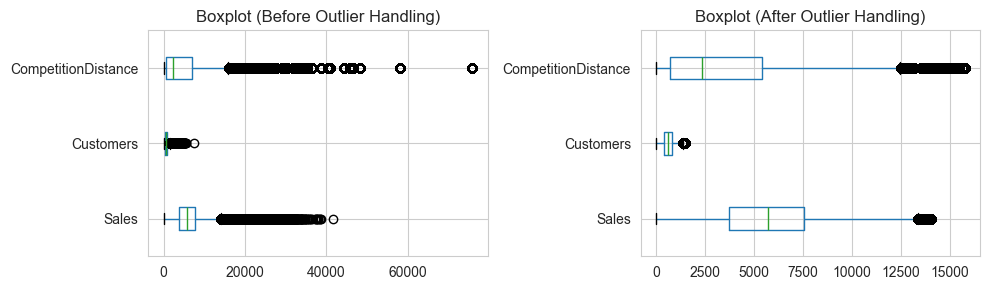

In [22]:
prepare_data.handle_outliers(method="iqr", plot=True)

2025-01-05 19:53:08,116 - INFO - Handling outliers...
2025-01-05 19:53:11,178 - INFO - Column 'Sales': Detected 0 outliers using Z-score.
2025-01-05 19:53:11,204 - INFO - Column 'Customers': Detected 0 outliers using Z-score.
2025-01-05 19:53:11,241 - INFO - Column 'CompetitionDistance': Detected 19414 outliers using Z-score.


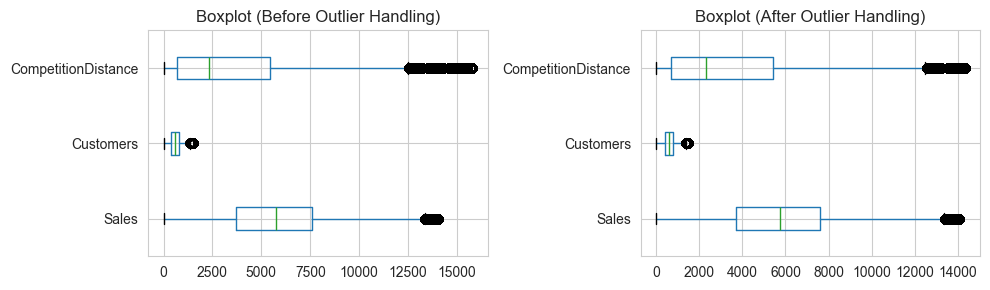

In [23]:
prepare_data.handle_outliers(method="zscore", plot=True)


## <font color = '#DF9166' size=6>**Sales Analysis**<font/><a class = 'anchor' id = 'sales_analysis'/>

In [58]:
# Initialize the SalesAnalysis
sales_analysis = SalesAnalysis(df)

SalesVariabilityAnalysis initialized with data!


Visualizing sales distribution...


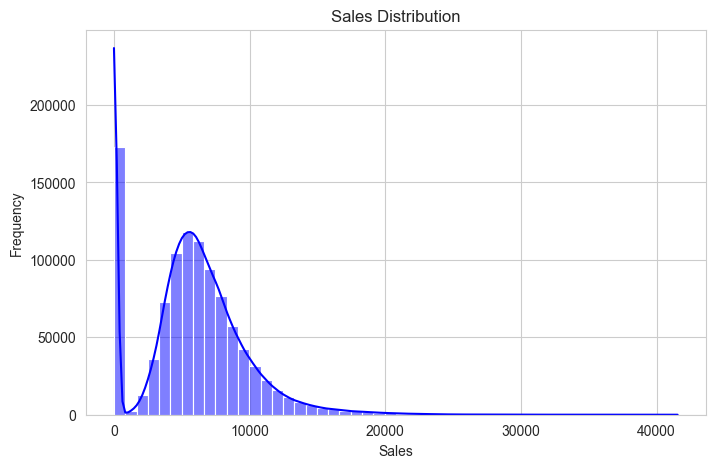

In [47]:
# Analyze the overall distribution of sales
sales_analysis.sales_distribution()

### Sales Segmentation

Analyzing sales distribution across store types...


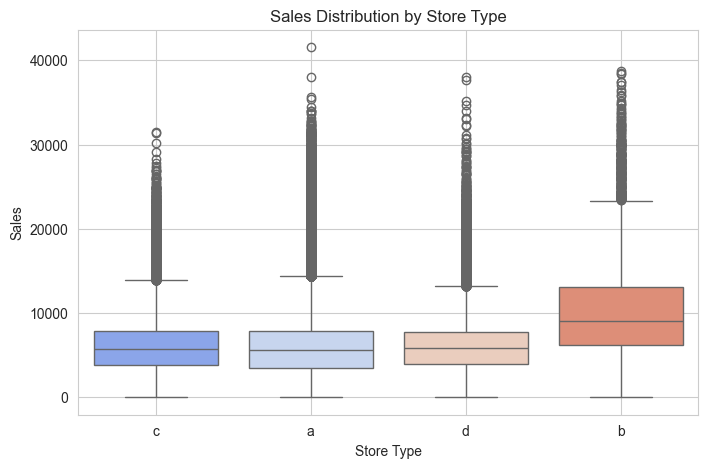

In [48]:
# Segment sales data by store type
sales_analysis.sales_by_store_type()

Analyzing sales distribution during promotion periods...


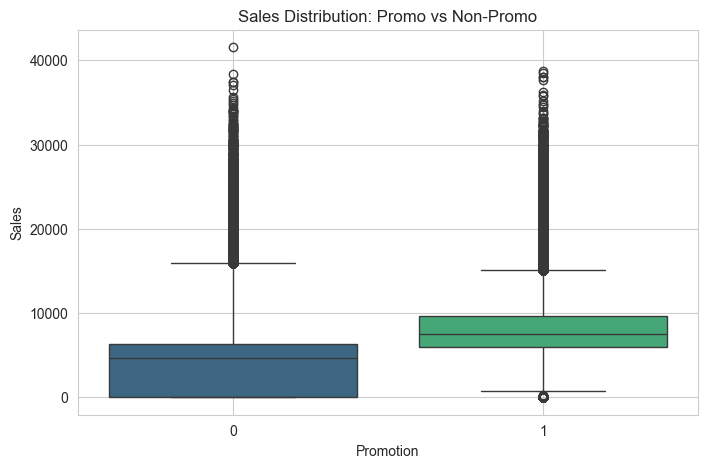

In [49]:
# Analyze sales distribution during promotion periods
sales_analysis.sales_by_promotion()

Analyzing sales distribution during holidays...


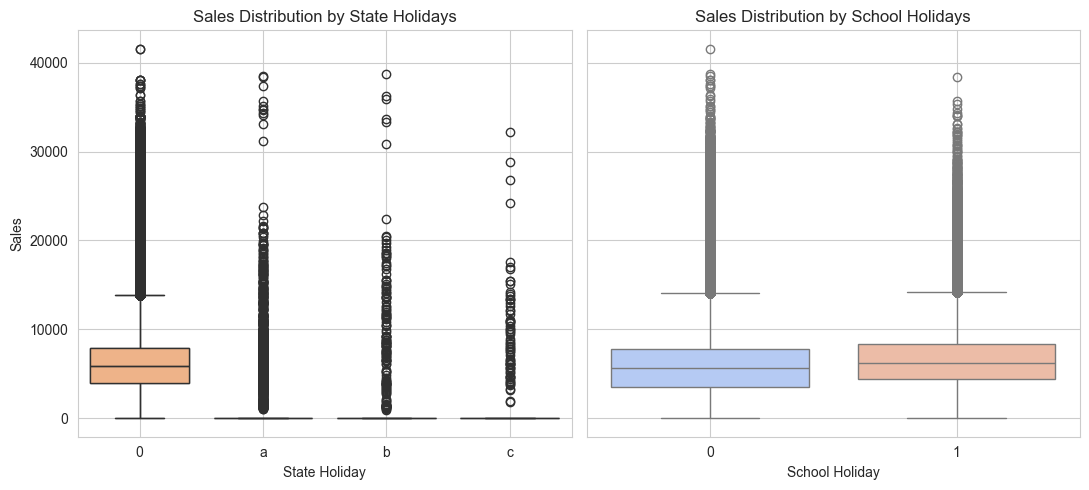

In [50]:
# Analyze sales distribution during holidays
sales_analysis.sales_by_holidays()

Comparing sales on holidays versus non-holidays...


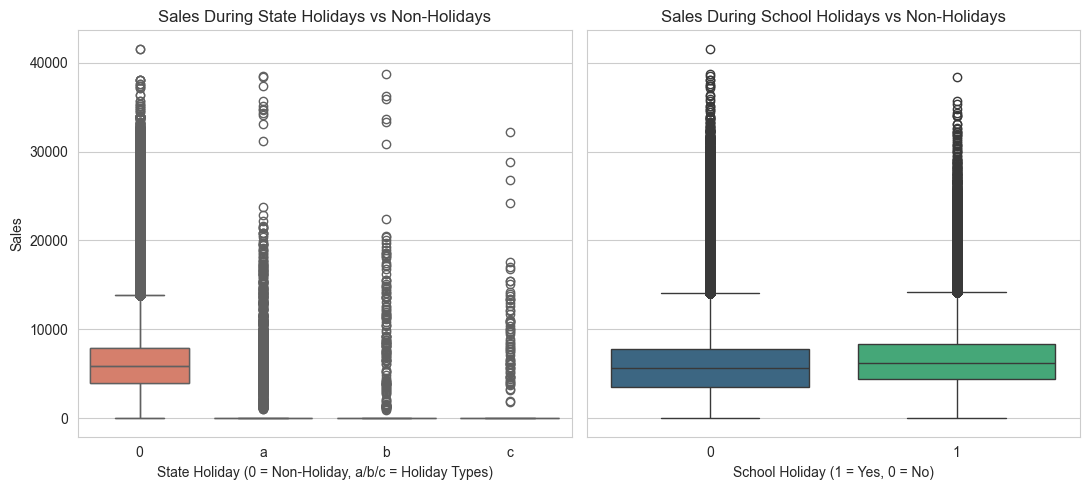

In [51]:
# Compare holiday vs non-holiday sales
sales_analysis.holiday_vs_non_holiday_sales()

### Sales Variability Analysis

Identifying high and low sales outliers...
High Sales Threshold: 12137.0
Low Sales Threshold: 0.0
Number of High Sales Days: 50843
Number of Low Sales Days: 0


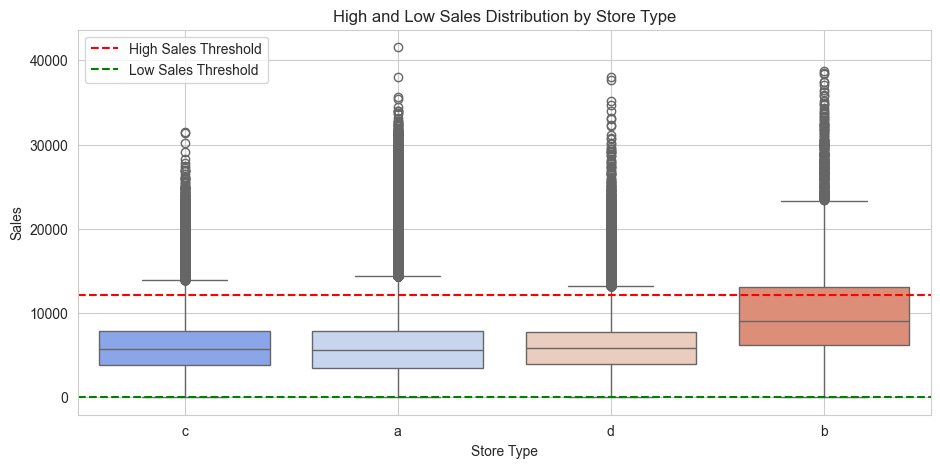

In [52]:
# Identify high and low sales outliers
sales_analysis.high_low_sales_analysis()

Analyzing daily sales variability...


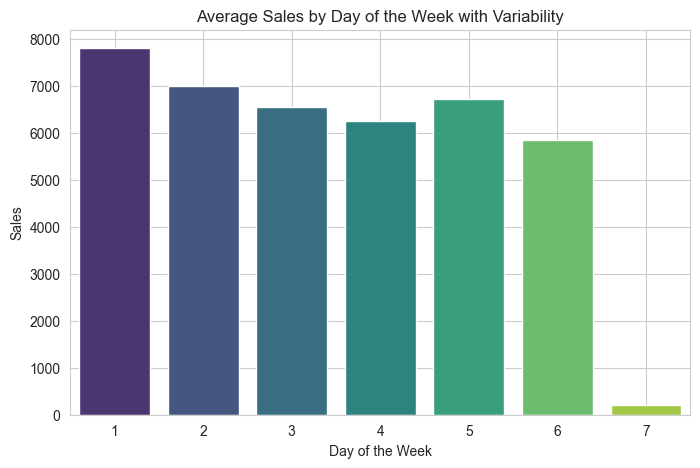

In [59]:
# Analyze daily sales variability
sales_analysis.sales_variability_by_day()

### Competition Distance on Sales

Analyzing the effect of competition distance on sales...


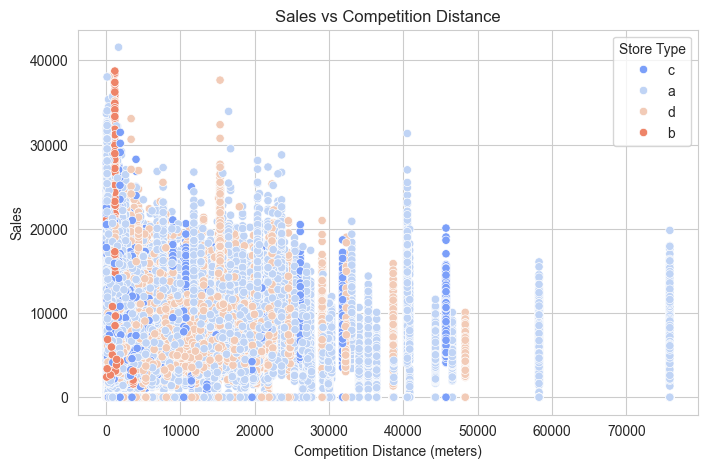

In [42]:
# Analyze the effect of competition distance on sales
sales_analysis.competition_distance_effect()

Visualizing sales distribution by competition distance groups...


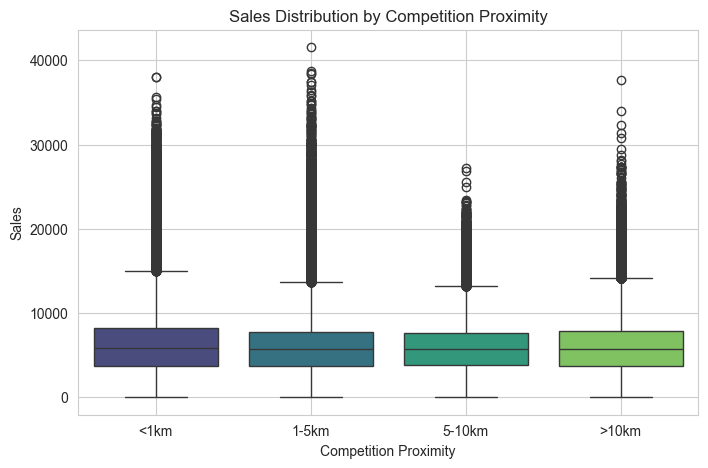

In [43]:
# Visualize sales distribution by competition distance proximity
sales_analysis.competition_sales_distribution()

Analyzing trends of average sales with increasing competition distance...


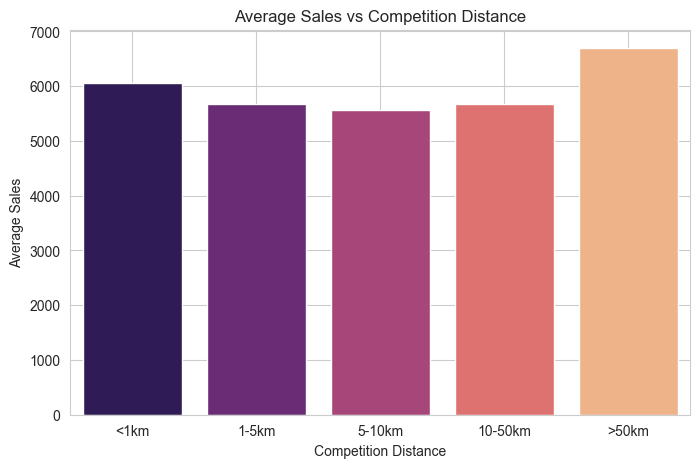

In [44]:
# Analyze trends of average sales with increasing competition distance
sales_analysis.sales_vs_distance_trend()

## <font color = '#DF9166' size=6>**Customer Analysis**<font/><a class = 'anchor' id = 'customer_analysis'/>

In [132]:
# Initialize the class with the DataFrame
customer_analysis = CustomerAnalysis(df)

Visualizing feature distributions and sales-per-customer ratio...


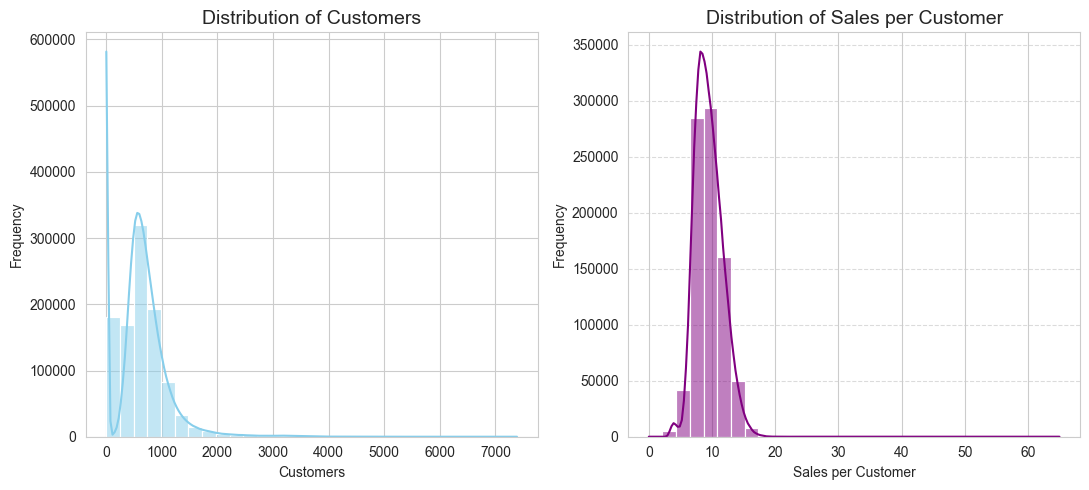

In [133]:
# Call the updated method
customer_analysis.visualize_customer_metrics()

Analyzing customer patterns by DayOfWeek...


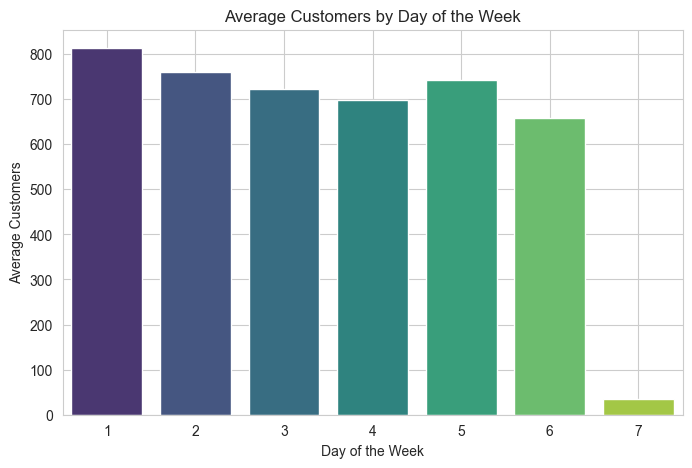

In [134]:
# Analyze average customer traffic by day of the week
customer_analysis.daily_customer_patterns()

Comparing customer behavior during promo periods...


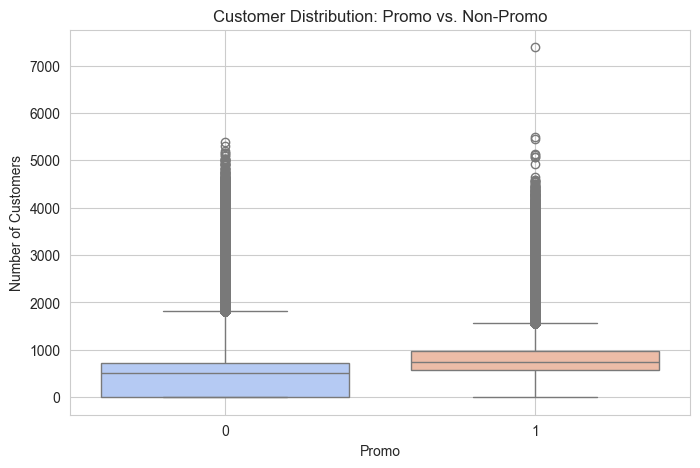

In [135]:
# Compare customer patterns during promotional periods
customer_analysis.promo_customer_patterns()

Comparing the impact of promotions and holidays on customer traffic...


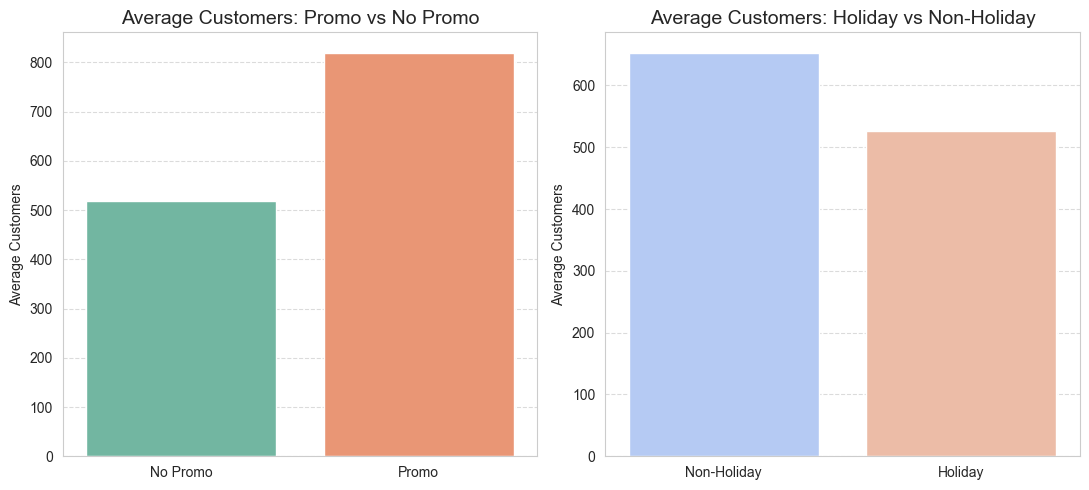

In [136]:
# Call the combined method
customer_analysis.compare_promo_and_holiday_impact()

Analyzing top 5 and bottom 3 stores by average customer count...


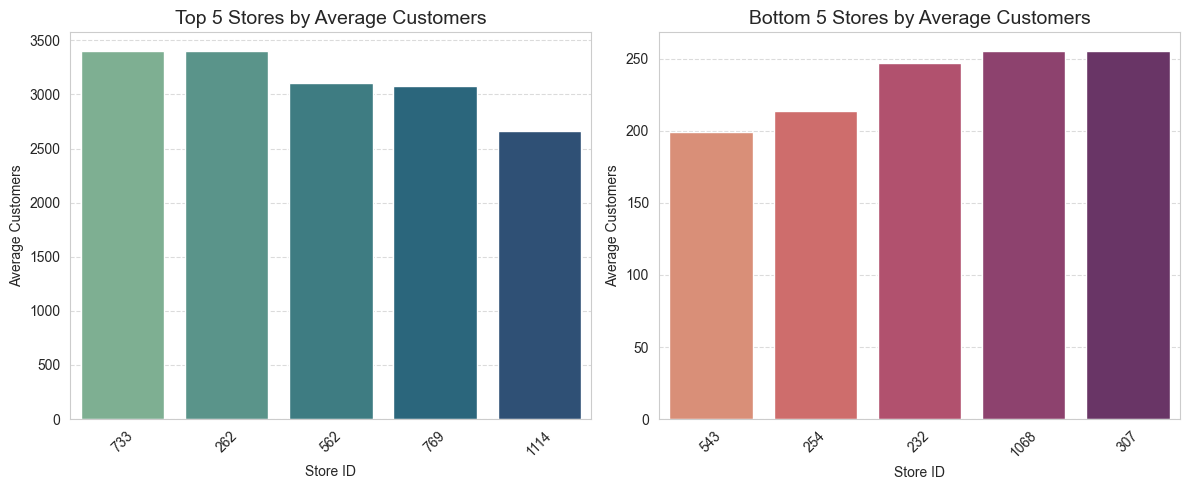

In [138]:
# Call the method to visualize top and bottom stores
customer_analysis.top_and_bottom_customer_stores(n=5)

## <font color = '#DF9166' size=6>**Store Analysis**<font/><a class = 'anchor' id = 'store_analysis'/>

In [174]:
# Initialize the StoreAnalysis class
store_analysis = StoreAnalysis(df)

### Data Overview

Analyzing the overall distribution of sales across all stores...


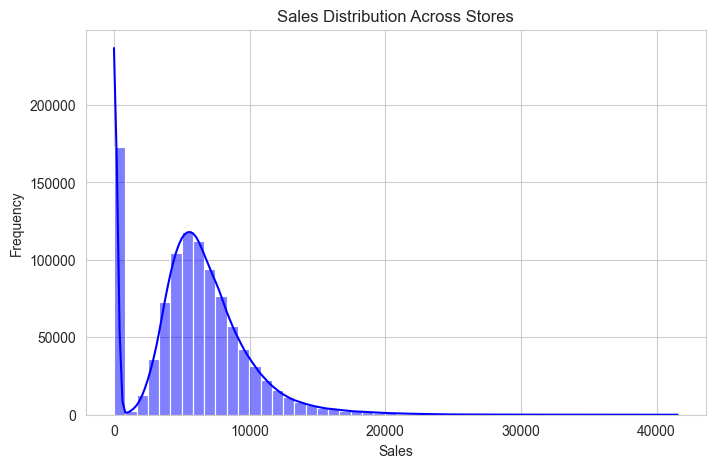

In [175]:
# Visualize sales distribution
store_analysis.sales_distribution()

Identifying the top 5 and bottom 5 performing stores...


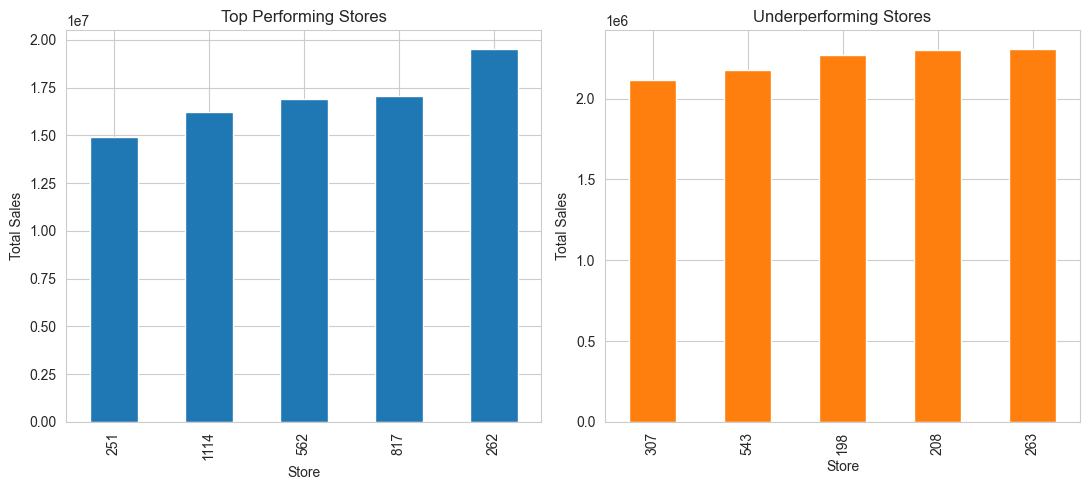

In [176]:
# Top and bottom 5 stores
store_analysis.top_and_bottom_stores(top_n=5)

### Store Performance Analysis

Analyzing the performance of different store types in terms of sales and customer numbers...


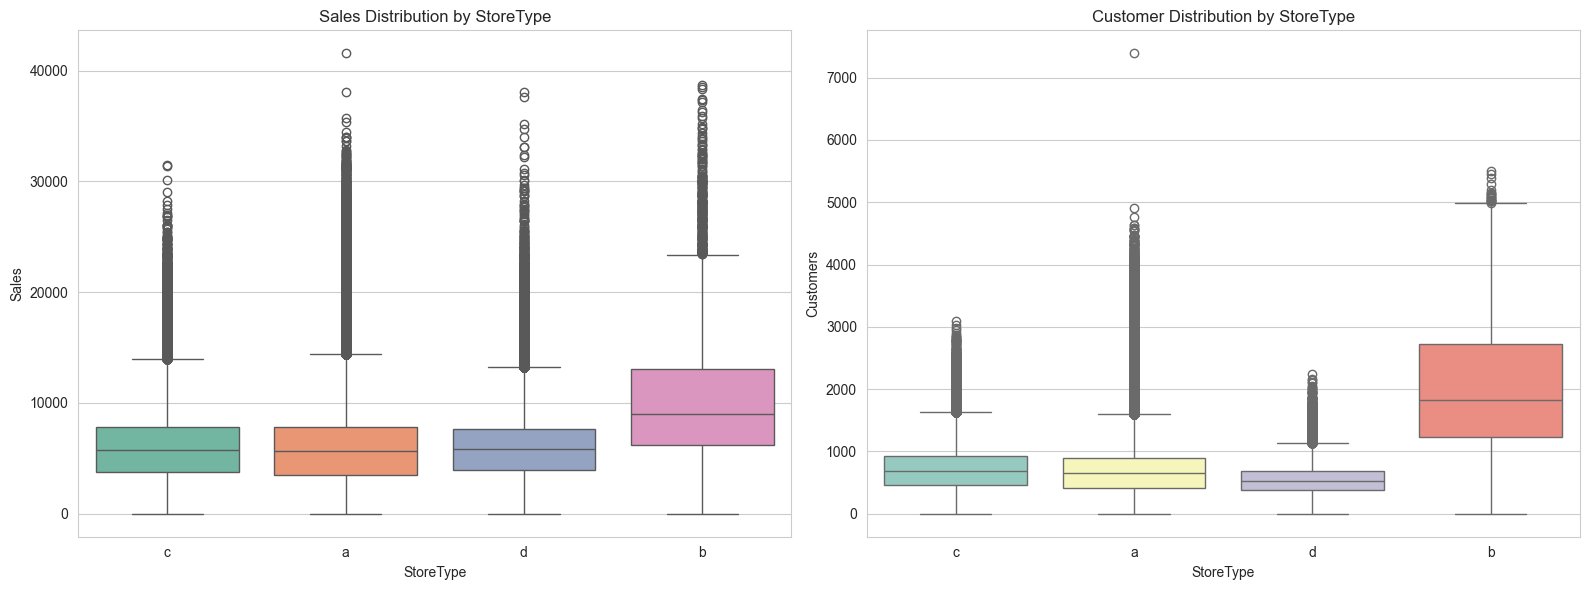

In [177]:
# Performance by store type
store_analysis.store_type_performance()

Comparing store types on key metrics like sales and customer numbers...


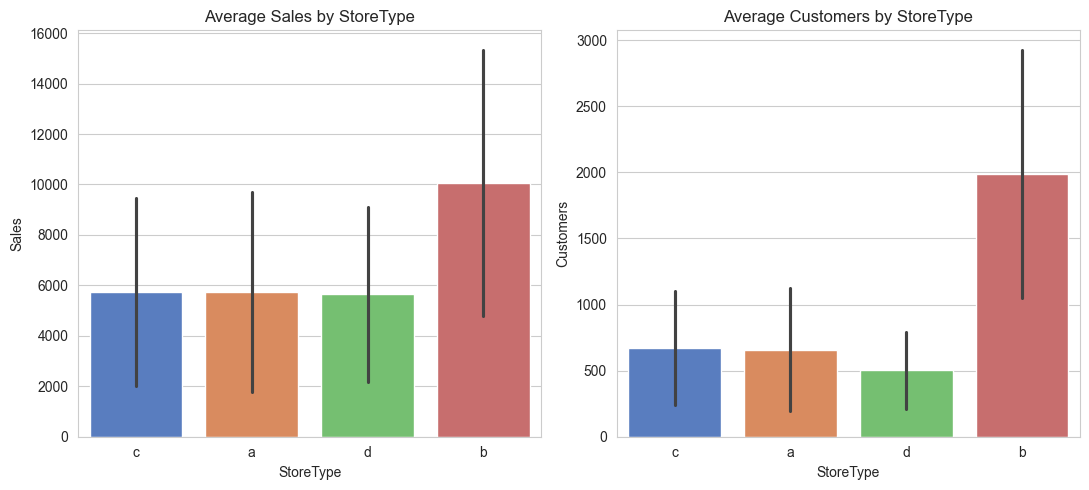

In [178]:
# Compare store types
store_analysis.compare_store_types()

### Assortment Analysis

Comparing the performance metrics between different assortments...


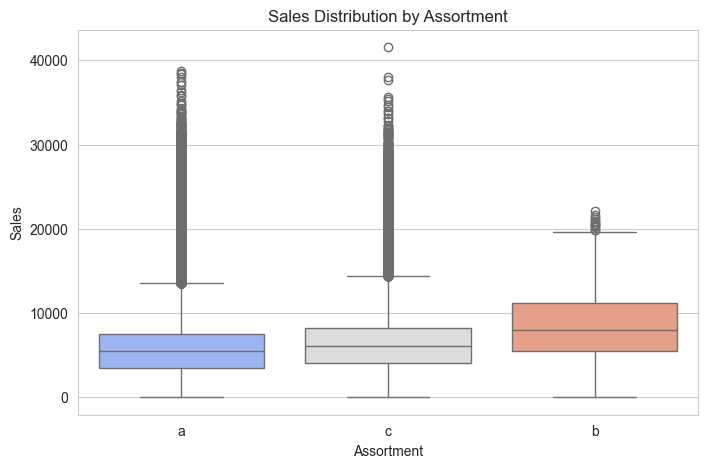

In [179]:
# Performance by assortment
store_analysis.assortment_performance()      

### Holiday Impact

Analyzing holiday impacts across different store types...


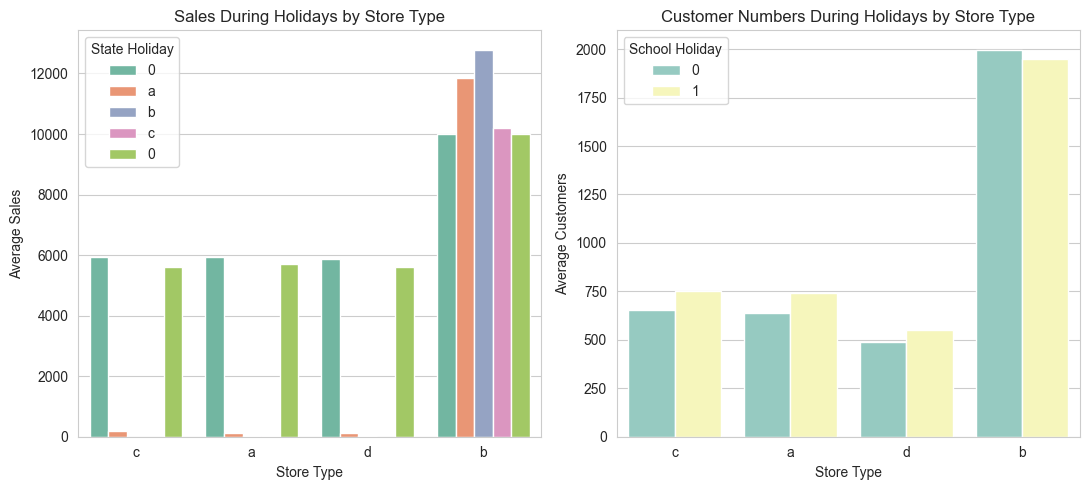

In [180]:
# Holiday impact by store type     
store_analysis.holiday_impact_by_store_type() 

Analyzing holiday impacts across different assortments...


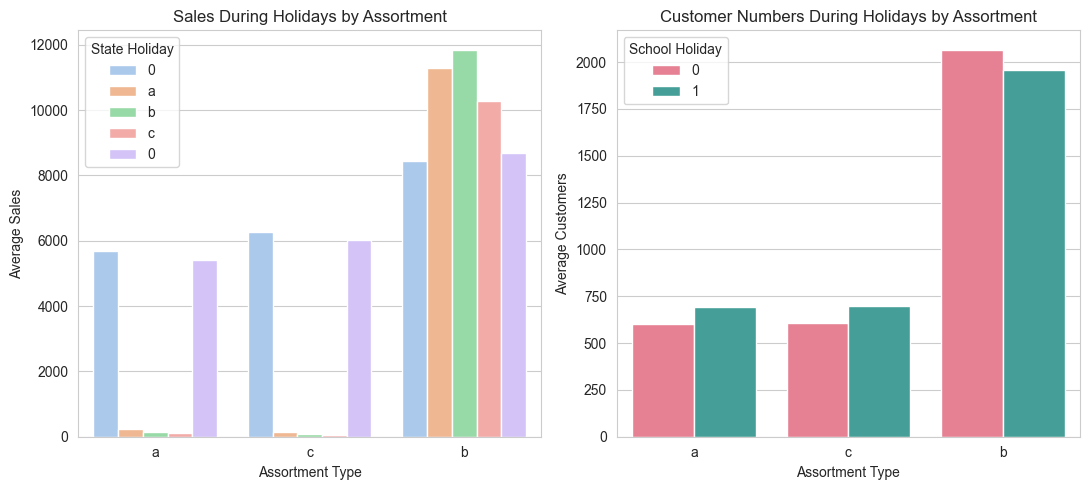

In [181]:
# Holiday impact by assortment
store_analysis.holiday_impact_by_assortment() 

## <font color = '#DF9166' size=6>**Promotional Analysis**<font/><a class = 'anchor' id = 'promotional_analysis'/>

In [242]:
# Instantiate the PromotionalAnalysis class
promo_analysis = PromotionalAnalysis(df)

Analyzing the effectiveness of promotions on sales and customer numbers...


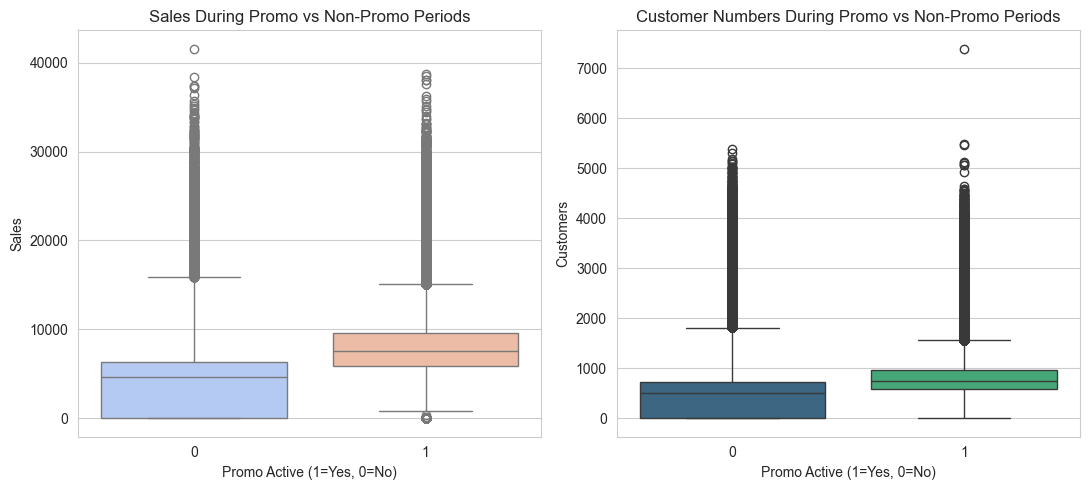

In [195]:
# Analyze the effectiveness of promotions
promo_analysis.promo_effectiveness()

Evaluating the impact of promotions on store sales...


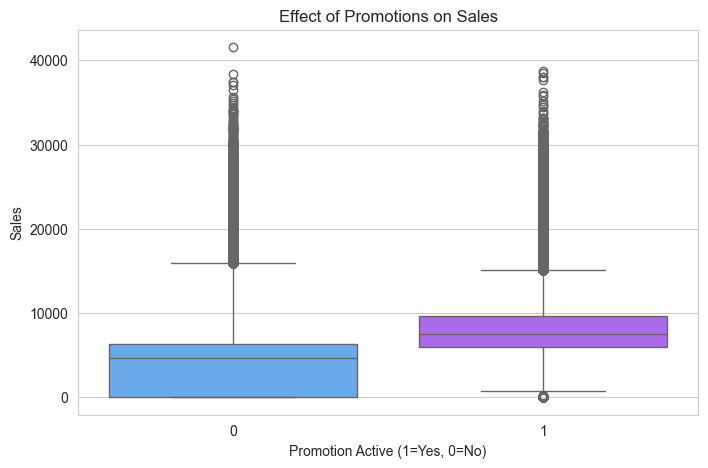

In [208]:

# Evaluate the effect of promotions on store sales
promo_analysis.promo_effect_on_sales()

Evaluating the impact of Promo2 on sales...


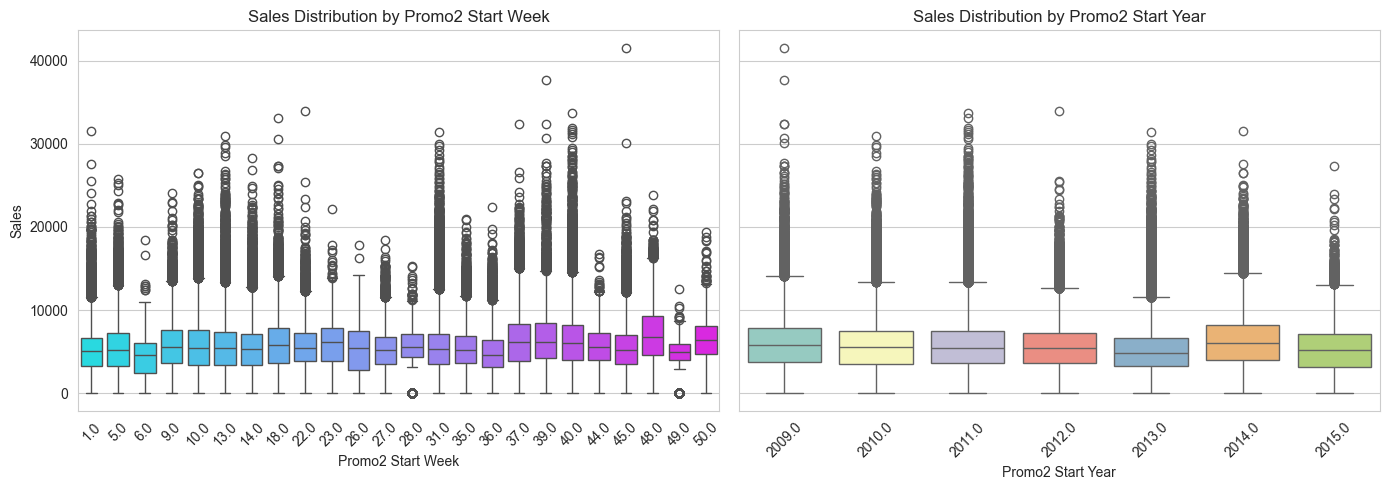

In [243]:
# Evaluate the impact of Promo2 on sales
promo_analysis.promo2_effectiveness()

In [ ]:
# Visualize feature interactions (promotions, store types, holidays)
promo_analysis.plot_detailed_feature_interactions()

Analyzing the impact of different PromoIntervals on sales...


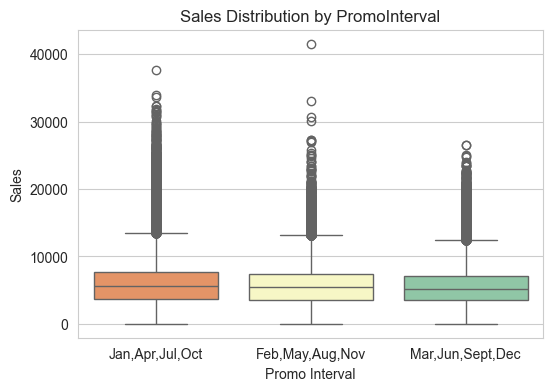

In [216]:
# Analyze the impact of PromoInterval on sales
promo_analysis.promo_interval_analysis()

Determining the optimal timing for promotions...


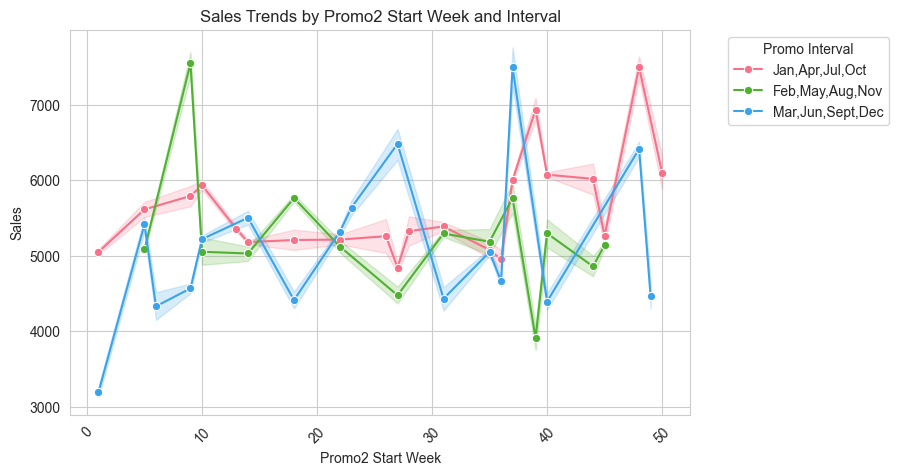

In [217]:
# Determine the optimal timing for promotions
promo_analysis.optimal_promo_timing()

## <font color = '#DF9166' size=6>**Trend Analysis**<font/><a class = 'anchor' id = 'trend_analysis'/>

In [39]:
# Initialize the TrendAnalysis class
trend_analysis = TrendAnalysis(df)

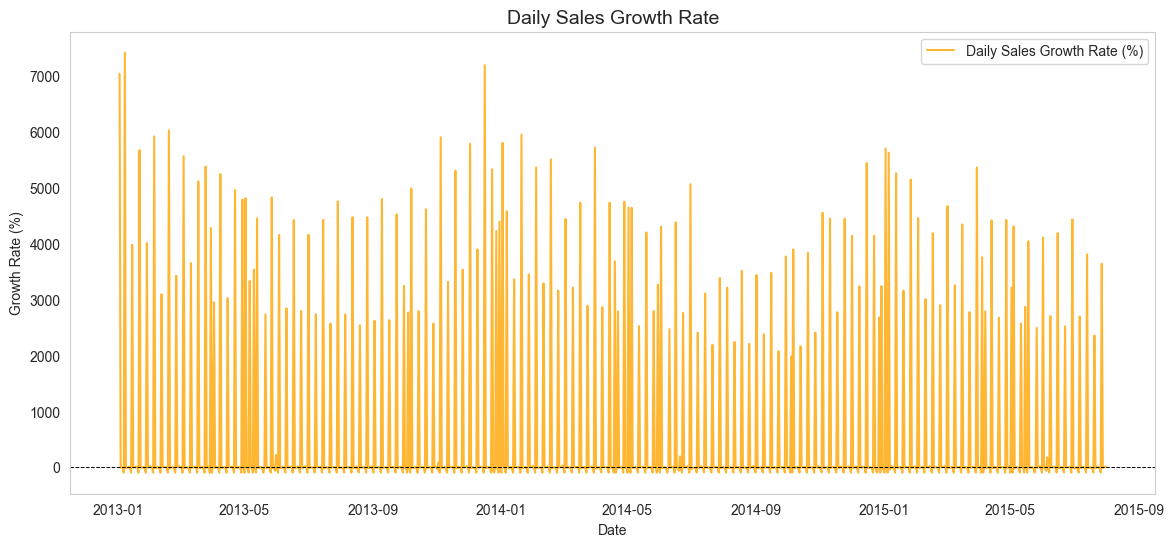

In [33]:
# Analyze Growth Rate
trend_analysis.analyze_growth_rate()

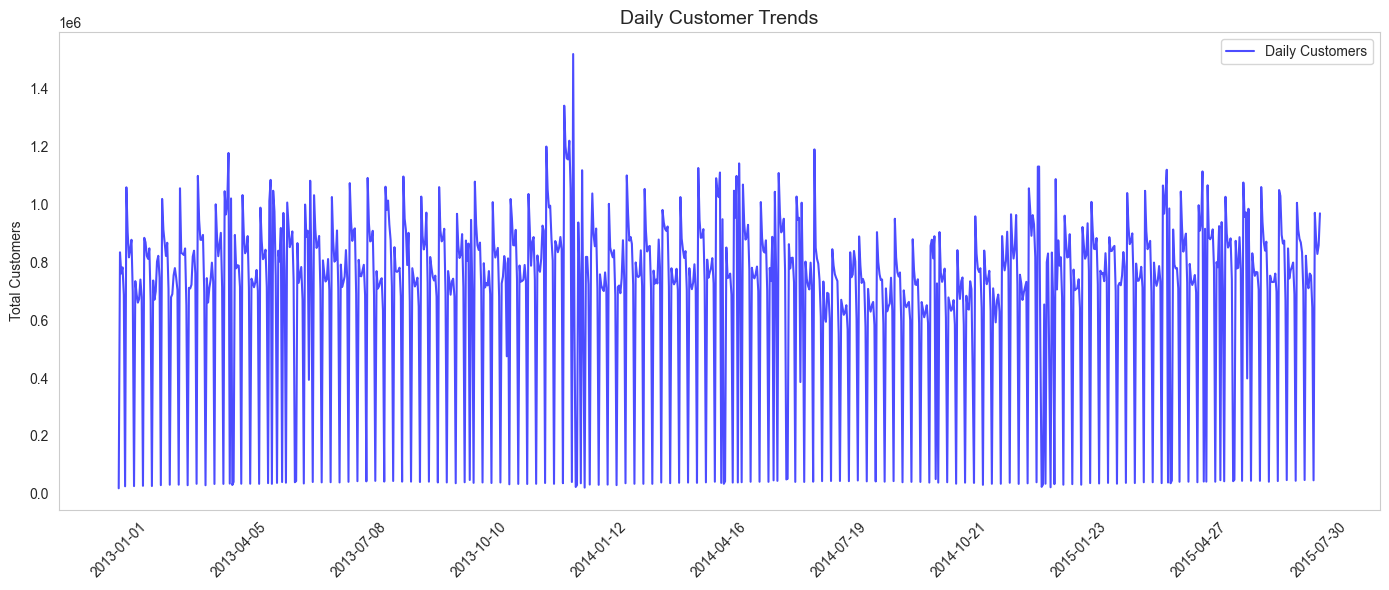

In [40]:
# Analyze customer trends over time
trend_analysis.analyze_customer_trends()

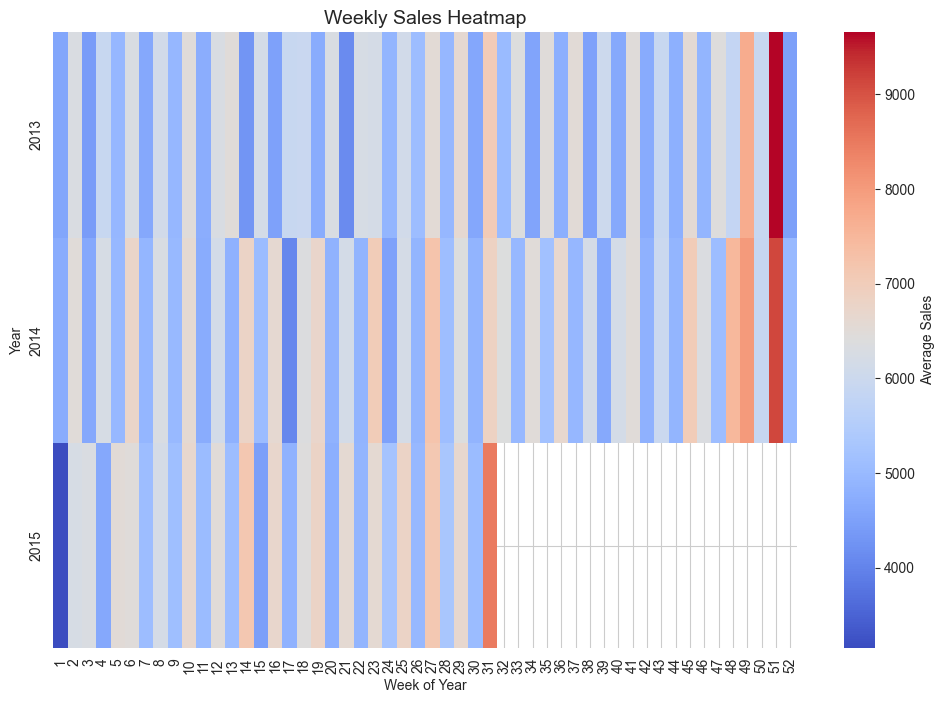

In [30]:
# Generate Weekly Sales Heatmap
trend_analysis.weekly_sales_heatmap()

## <font color = '#DF9166' size=6>**Correlation Analysis**<font/><a class = 'anchor' id = 'correlation_analysis'/>

In [47]:
# Initialize the CorrelationAnalysis class
correlation_analysis = CorrelationAnalysis(df)

CorrelationAnalysis initialized with data!


Analyzing relationship between Sales and Customers...


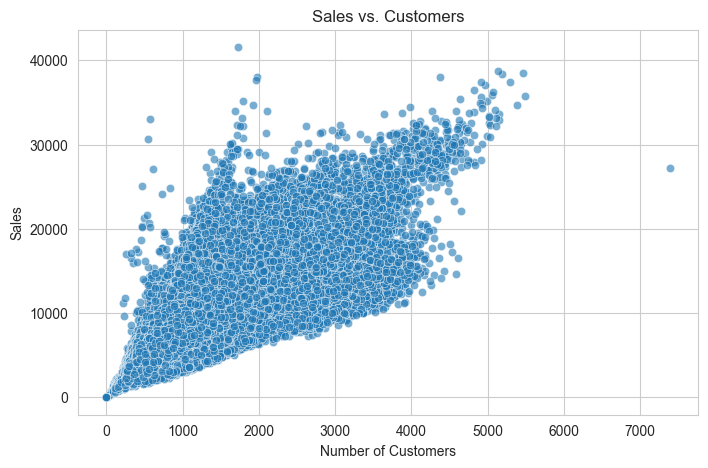

In [44]:
# Plot relationship between Sales and Customers
correlation_analysis.plot_customer_sales_relationship()

Generating scatter matrix visualization...


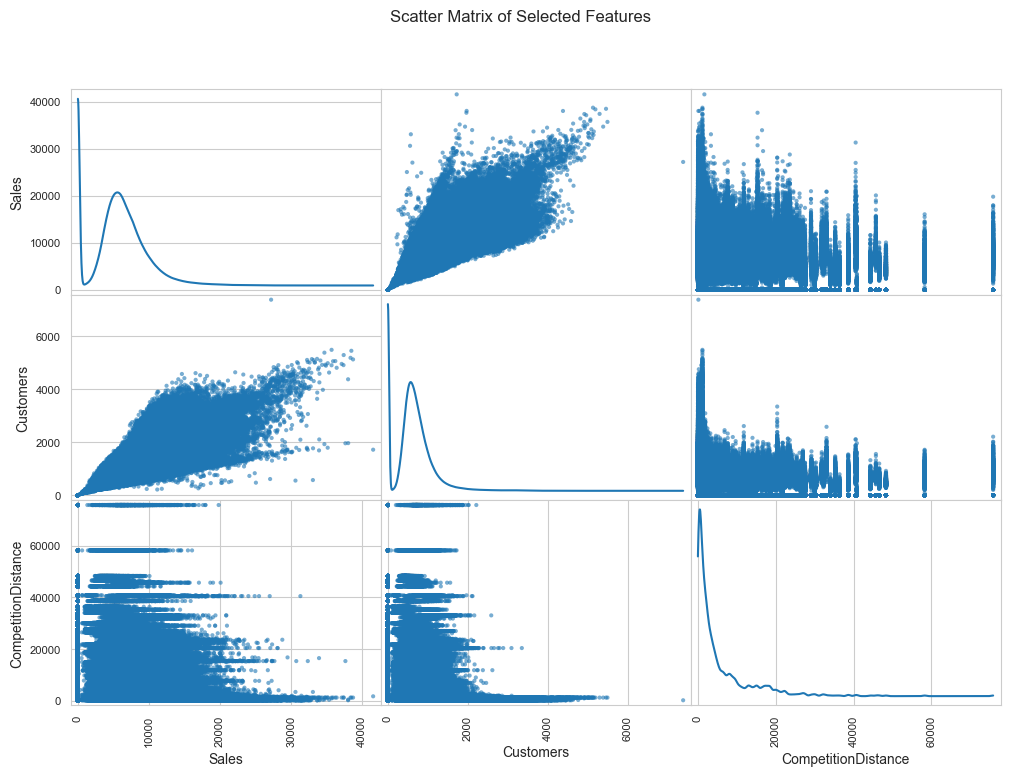

In [254]:
# Generate scatter matrix for selected features
correlation_analysis.plot_scatter_matrix()

Performing multivariate analysis...


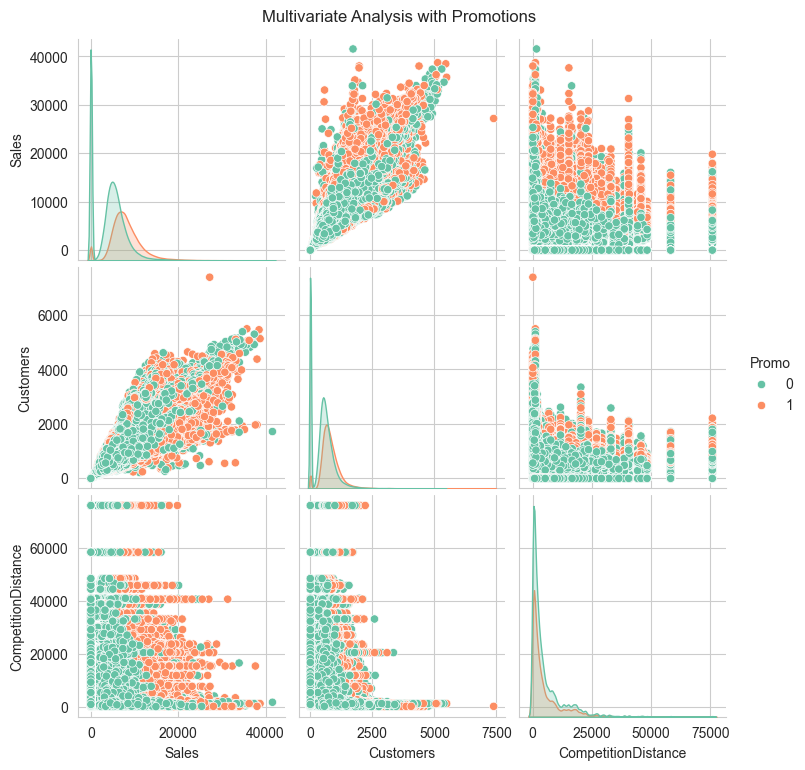

In [48]:
# Multivariate analysis
correlation_analysis.plot_multivariate_feature_analysis()

Analyzing correlations with Sales...
Feature correlations with Sales:
Sales                        1.000000
Customers                    0.894711
Open                         0.678472
Promo                        0.452345
SchoolHoliday                0.085124
Promo2SinceWeek              0.059558
CompetitionOpenSinceYear     0.012659
Store                        0.005126
CompetitionDistance         -0.019229
Promo2SinceYear             -0.021127
CompetitionOpenSinceMonth   -0.028257
Promo2                      -0.091040
DayOfWeek                   -0.462125
Name: Sales, dtype: float64


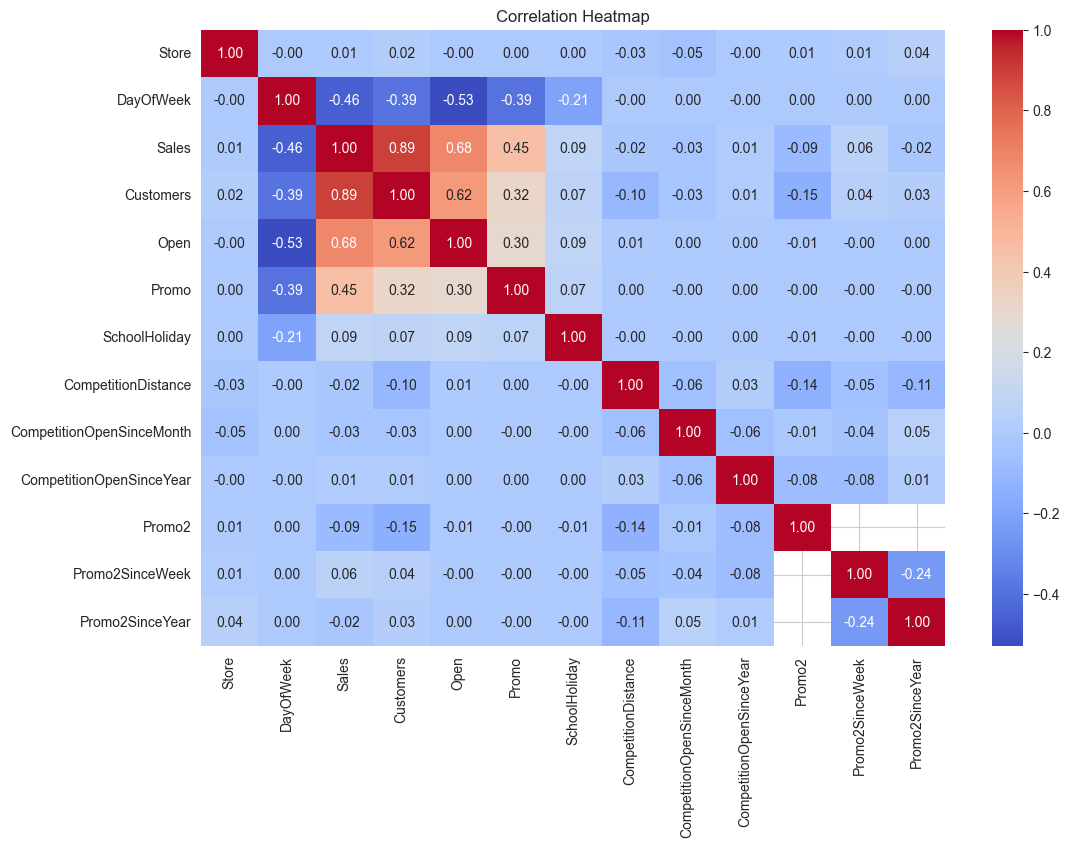

In [49]:
# Analyze correlations with Sales
correlation_analysis.analyze_correlations()